In [168]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [169]:
anc_variant_cost = np.load('../test/AU0162.chr.10.ancestral_variants.npy')
final_states = np.load('../test/AU0162.chr.10.final_states.npy')
genotypes = np.load('../test/AU0162.chr.10.family_genotypes.npy')
positions = np.load('../test/AU0162.chr.10.genomic_intervals.npy')

In [188]:
anc_variants = anc_variant_cost/np.sum(anc_variant_cost, axis=0)
print(anc_variants.shape)
print(genotypes.shape)

(81, 474101)
(4, 474101)


In [179]:
m1_m2 = np.sum(anc_variants[np.array([x[0]==x[1] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)
m1_p1 = np.sum(anc_variants[np.array([x[0]==x[2] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)
m1_p2 = np.sum(anc_variants[np.array([x[0]==x[3] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)
m2_p1 = np.sum(anc_variants[np.array([x[1]==x[2] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)
m2_p2 = np.sum(anc_variants[np.array([x[1]==x[3] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)
p1_p2 = np.sum(anc_variants[np.array([x[2]==x[3] for x in product(*[[0, 1, 2]]*4)]), :], axis=0)

In [190]:
print(genotypes[:, np.any(genotypes>0, axis=0)].T)

[[0 1 0 2]
 [2 2 2 2]
 [1 1 0 0]
 ...
 [1 1 0 2]
 [0 1 1 0]
 [1 1 0 1]]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


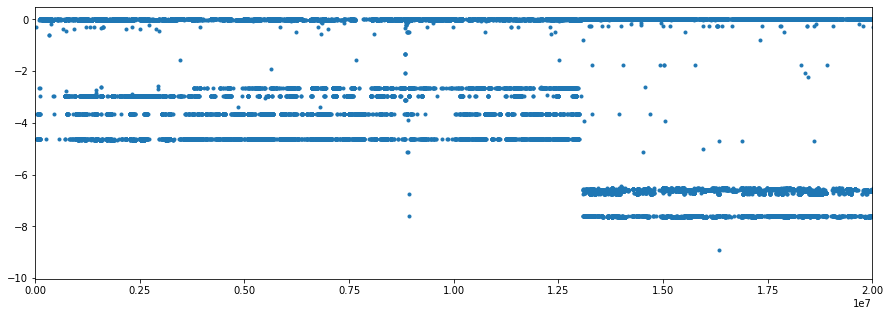

In [196]:
plt.figure(figsize=(15, 5))
plt.scatter(positions[np.any(genotypes==1, axis=0), 0], np.log10(m2_p1[np.any(genotypes==1, axis=0)]),
           marker='.')
plt.xlim([0, 20000000])

plt.show()

In [181]:
smoothed_m1_m2 = 10**np.convolve(np.log10(m1_m2), np.ones((1000,))/1000, mode='same')
smoothed_m1_p1 = 10**np.convolve(np.log10(m1_p1), np.ones((1000,))/1000, mode='same')
smoothed_m1_p2 = 10**np.convolve(np.log10(m1_p2), np.ones((1000,))/1000, mode='same')
smoothed_m2_p1 = 10**np.convolve(np.log10(m2_p1), np.ones((1000,))/1000, mode='same')
smoothed_m2_p2 = 10**np.convolve(np.log10(m2_p2), np.ones((1000,))/1000, mode='same')
smoothed_p1_p2 = 10**np.convolve(np.log10(p1_p2), np.ones((1000,))/1000, mode='same')



//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


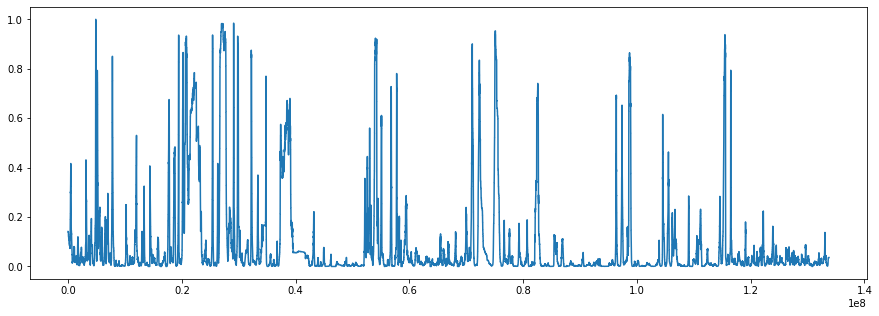

In [203]:

plt.figure(figsize=(15, 5))
plt.plot(positions[:, 0], smoothed_m1_p1)
plt.show()

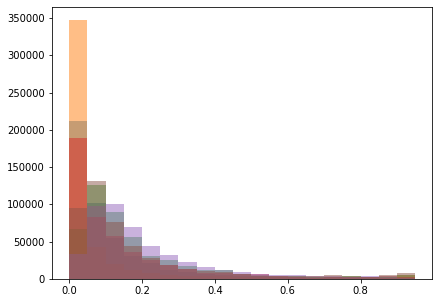

In [206]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(smoothed_m1_m2, bins=np.arange(0, 1, 0.05), alpha=0.5)
plt.hist(smoothed_m1_p1, bins=np.arange(0, 1, 0.05), alpha=0.5)
plt.hist(smoothed_m1_p2, bins=np.arange(0, 1, 0.05), alpha=0.5)
plt.hist(smoothed_m2_p1, bins=np.arange(0, 1, 0.05), alpha=0.5)
plt.hist(smoothed_m2_p2, bins=np.arange(0, 1, 0.05), alpha=0.5)
plt.hist(smoothed_p1_p2, bins=np.arange(0, 1, 0.05), alpha=0.5)

plt.show()

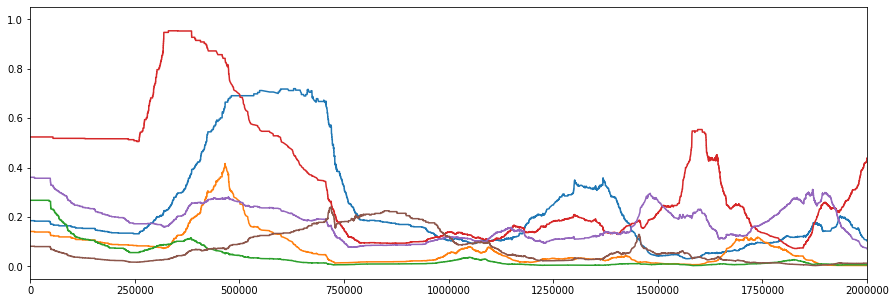

In [176]:

plt.figure(figsize=(15, 5))
plt.plot(positions[:, 0], smoothed_m1_m2)
plt.plot(positions[:, 0], smoothed_m1_p1)
plt.plot(positions[:, 0], smoothed_m1_p2)
plt.plot(positions[:, 0], smoothed_m2_p1)
plt.plot(positions[:, 0], smoothed_m2_p2)
plt.plot(positions[:, 0], smoothed_p1_p2)
plt.xlim([0, 2000000])
plt.show()

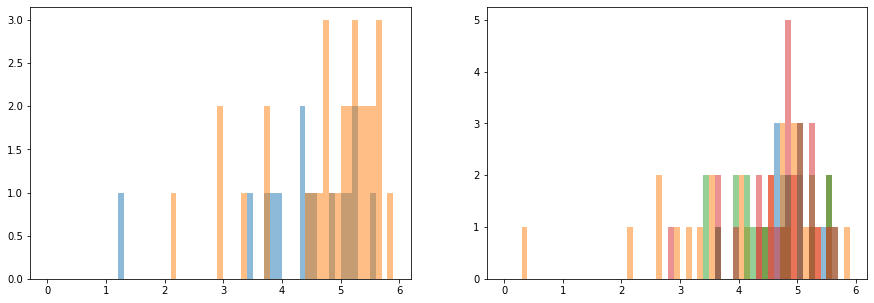

In [178]:
def plot_interval_lengths(x, cutoff):

    start_indices = np.where((x[:-1]<cutoff) & (x[1:]>=cutoff))[0]+1
    end_indices = np.where((x[:-1]>=cutoff) & (x[1:]<cutoff))[0]+1
    if start_indices[0]>end_indices[0]:
        start_indices = np.hstack(([0], start_indices))
    if start_indices[-1]>end_indices[-1]:
        end_indices = np.hstack((end_indices, [positions.shape[0]-1]))
    lengths = positions[end_indices, 0]-positions[start_indices, 0]

    #print(len(start_indices), len(end_indices))
    plt.hist(np.log10(lengths), 
             bins=np.arange(0, 6, 0.1), alpha=0.5)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
plot_interval_lengths(smoothed_m1_m2, 0.8)
plot_interval_lengths(smoothed_p1_p2, 0.8)

plt.subplot(1, 2, 2, sharex=ax)
plot_interval_lengths(smoothed_m1_p1, 0.8)
plot_interval_lengths(smoothed_m1_p2, 0.8)
plot_interval_lengths(smoothed_m2_p1, 0.8)
plot_interval_lengths(smoothed_m2_p2, 0.8)
plt.show()


(array([1.34100e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.72000e+02,
        4.62895e+05, 0.00000e+00, 0.00000e+00, 1.20000e+01, 9.28100e+03]),
 array([8.36616970e-12, 1.98393938e-01, 3.96787876e-01, 5.95181815e-01,
        7.93575753e-01, 9.91969691e-01, 1.19036363e+00, 1.38875757e+00,
        1.58715151e+00, 1.78554544e+00, 1.98393938e+00]),
 <a list of 10 Patch objects>)

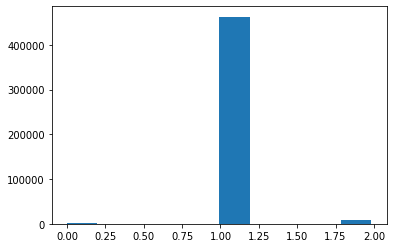

In [86]:
plt.hist(np.sum(anc_variants, axis=0))

In [87]:
print(genotypes[:, np.sum(anc_variants, axis=0)<0.5][:, :5].T)

[[0 1 0 2]
 [2 2 1 2]
 [2 2 1 2]
 [0 0 0 1]
 [1 1 1 1]]


In [88]:
print(genotypes[:, np.sum(anc_variants, axis=0)>1.5][:,:5].T)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


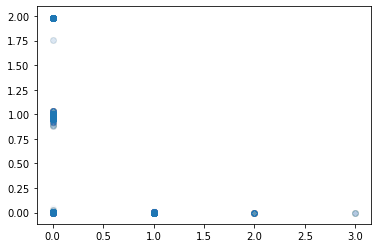

In [89]:
plt.scatter(np.sum(genotypes==-1, axis=0), np.sum(anc_variants, axis=0), alpha=0.01)
plt.show()

In [64]:
anc_variants[:, :2]

array([[9.99056652e-01, 1.89266883e-11],
       [8.75350652e-04, 8.64443561e-07],
       [0.00000000e+00, 0.00000000e+00],
       [9.61488613e-10, 5.42534907e-07],
       [7.71772911e-10, 1.16702575e-10],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.12057262e-03, 2.12287548e-14],
       [9.81820172e-07, 9.69586444e-10],
       [0.00000000e+00, 0.00000000e+00],
       [1.07843515e-12, 6.08523813e-10],
       [8.65644197e-13, 1.30897192e-13],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000